In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/ruan/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/tmp/ipykernel_48267/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
POPULATION = 332_333

In [3]:
df = pd.read_csv("informe_covid_cascavel.csv")
df_week = pd.read_csv("covid_cascavel_week.csv")

/tmp/ipykernel_48267/4266950253.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("informe_covid_cascavel.csv")


In [47]:
# Gerando o df de casos por semana


df["DATA_DIAGNOSTICO"] = pd.to_datetime(df["DATA_DIAGNOSTICO"])
df_week = df.groupby(pd.Grouper(key='DATA_DIAGNOSTICO', freq='W-Mon')).agg({
    'SEXO': 'count',
    'ÓBITO COVID-19': lambda x: (x == 'SIM').sum(),
    'IDADE_ORIGINAL': 'mean',
}).reset_index()

# rename "SEXO" to "CASOS"
df_week.rename(columns={"SEXO": "CASOS", "IDADE_ORIGINAL": "IDADE_MEDIA"}, inplace=True)
df_week["ÓBITO COVID-19"] = df_week["ÓBITO COVID-19"].astype(int)
df_week["CASOS"] = df_week["CASOS"].astype(int)
df_week["CASOS_ACUMULADOS"] = df_week["CASOS"].cumsum()
df_week["POPULAÇÃO SUSCETÍVEL"] = POPULATION - df_week["CASOS"].cumsum()
df_week["ÓBITOS ACUMULADOS"] = df_week["ÓBITO COVID-19"].cumsum()
df_week["MORTALIDADE / 100k"] = df_week["ÓBITOS ACUMULADOS"] / df_week["POPULAÇÃO SUSCETÍVEL"] * 100_000
df_week["LETALIDADE_ACUMULADA %"] = df_week["ÓBITOS ACUMULADOS"] / df_week["CASOS_ACUMULADOS"] * 100
df_week["LETALIDADE %"] = df_week["ÓBITO COVID-19"] / df_week["CASOS"] * 100

# Nova coluna CASOS_ACUMULADOS é a soma cumulativa de CASOS de duas até duas semanas atrás menos os óbitos menos os 
# Ou seja, apenas somar os casos de duas semanas atrás com os casos da   semana passada
df_week['INFECTADOS'] = (
    df_week['CASOS'].shift(0).fillna(0) +
    df_week['CASOS'].shift(1).fillna(0) +
    df_week['CASOS'].shift(2).fillna(0) -
    df_week['ÓBITO COVID-19'].shift(0).fillna(0) -
    df_week['ÓBITO COVID-19'].shift(1).fillna(0) - 
    df_week['ÓBITO COVID-19'].shift(2).fillna(0)
)

#  RECUPERADOS é a soma cumulativa de óbitos e casos de MAIS de duas semanas atrás
df_week['RECUPERADOS'] = (
    df_week['ÓBITO COVID-19'].cumsum() +
    df_week['CASOS_ACUMULADOS'].shift(3).fillna(0)
) 
# df_week.to_csv("covid_cascavel_week.csv", index=False)
# df_week.to_excel("covid_cascavel_week.xlsx", index=False)
df_week


,DATA_DIAGNOSTICO,CASOS,ÓBITO COVID-19,IDADE_MEDIA,CASOS_ACUMULADOS,POPULAÇÃO SUSCETÍVEL,ÓBITOS ACUMULADOS,MORTALIDADE / 100k,LETALIDADE_ACUMULADA %,LETALIDADE %,INFECTADOS,RECUPERADOS
0,2020-03-23,2,0,32.500000,2,332331,0,0.000000,0.000000,0.000000,2.0,0.0
1,2020-03-30,9,1,42.555556,11,332322,1,0.300913,9.090909,11.111111,10.0,1.0
2,2020-04-06,35,1,47.314286,46,332287,2,0.601889,4.347826,2.857143,44.0,2.0
3,2020-04-13,16,1,43.125000,62,332271,3,0.902877,4.838710,6.250000,57.0,5.0
4,2020-04-20,6,0,50.333333,68,332265,3,0.902894,4.411765,0.000000,55.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-10-23,144,0,45.027778,87355,244978,1302,531.476296,1.490470,0.000000,300.0,88354.0
188,2023-10-30,143,0,39.762238,87498,244835,1302,531.786714,1.488034,0.000000,365.0,88433.0
189,2023-11-06,85,0,39.705882,87583,244750,1302,531.971399,1.486590,0.000000,372.0,88513.0
190,2023-11-13,110,0,36.836364,87693,244640,1302,532.210595,1.484725,0.000000,338.0,88657.0


In [48]:

df_week["CASOS_ACUMULADOS"] = df_week["CASOS"].cumsum()

df_week['INFECTADOS'] = (
    df_week['CASOS'].shift(0).fillna(0) +
    df_week['CASOS'].shift(1).fillna(0) +
    df_week['CASOS'].shift(2).fillna(0) -
    df_week['ÓBITO COVID-19'].shift(0).fillna(0) -
    df_week['ÓBITO COVID-19'].shift(1).fillna(0) - 
    df_week['ÓBITO COVID-19'].shift(2).fillna(0)
)

#  RECUPERADOS é a soma cumulativa de óbitos e casos de MAIS de duas semanas atrás
df_week['RECUPERADOS'] = (
    df_week['ÓBITO COVID-19'].cumsum() +
    df_week['CASOS_ACUMULADOS'].shift(3).fillna(0)
) 

In [49]:
df_week

,DATA_DIAGNOSTICO,CASOS,ÓBITO COVID-19,IDADE_MEDIA,CASOS_ACUMULADOS,POPULAÇÃO SUSCETÍVEL,ÓBITOS ACUMULADOS,MORTALIDADE / 100k,LETALIDADE_ACUMULADA %,LETALIDADE %,INFECTADOS,RECUPERADOS
0,2020-03-23,2,0,32.500000,2,332331,0,0.000000,0.000000,0.000000,2.0,0.0
1,2020-03-30,9,1,42.555556,11,332322,1,0.300913,9.090909,11.111111,10.0,1.0
2,2020-04-06,35,1,47.314286,46,332287,2,0.601889,4.347826,2.857143,44.0,2.0
3,2020-04-13,16,1,43.125000,62,332271,3,0.902877,4.838710,6.250000,57.0,5.0
4,2020-04-20,6,0,50.333333,68,332265,3,0.902894,4.411765,0.000000,55.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-10-23,144,0,45.027778,87355,244978,1302,531.476296,1.490470,0.000000,300.0,88354.0
188,2023-10-30,143,0,39.762238,87498,244835,1302,531.786714,1.488034,0.000000,365.0,88433.0
189,2023-11-06,85,0,39.705882,87583,244750,1302,531.971399,1.486590,0.000000,372.0,88513.0
190,2023-11-13,110,0,36.836364,87693,244640,1302,532.210595,1.484725,0.000000,338.0,88657.0


## Exploração Inicial

In [40]:
df.head()

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,EXAME,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,ÓBITO COVID-19,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
0,4104808,4104808,PR,F,77,CASCAVEL,CASCAVEL,188.0,2023-10-12,2023-11-21,2023-10-05,SIM,2023-11-13,2023-11-21,Óbito por COVID-19,NaN,Notifica COVID-19
1,4104808,4104808,PR,M,67,CASCAVEL,CASCAVEL,1.0,2023-10-23,2023-11-09,2023-10-23,NÃO,2023-10-25,2023-11-21,Óbito por Outras Causas,NaN,Notifica COVID-19
2,4104808,4104808,PR,M,34,CASCAVEL,CASCAVEL,27.0,2023-10-01,2023-11-08,2023-09-18,NÃO,2023-09-29,2023-11-09,Óbito por Outras Causas,NaN,Notifica COVID-19
3,4104808,4104808,PR,M,79,CASCAVEL,CASCAVEL,27.0,2023-10-11,2023-10-20,2023-10-07,SIM,2023-10-18,2023-10-20,Óbito por COVID-19,NaN,Notifica COVID-19
4,4104808,4104808,PR,M,81,CASCAVEL,CASCAVEL,1.0,2023-10-05,2023-10-17,2023-10-01,SIM,2023-10-15,2023-10-17,Óbito por COVID-19,NaN,Notifica COVID-19


In [45]:
# dados gerais e idade média de óbitos
df.loc[df['ÓBITO COVID-19'] == 'SIM']["IDADE_ORIGINAL"].describe(), df.loc[df['ÓBITO COVID-19'] == 'SIM']["IDADE_ORIGINAL"].mode()


(count    1302.000000
 mean       66.564516
 std        16.917853
 min         0.000000
 25%        56.000000
 50%        69.000000
 75%        79.000000
 max       113.000000
 Name: IDADE_ORIGINAL, dtype: float64,
 0    73
 Name: IDADE_ORIGINAL, dtype: int64)

In [41]:

df[df['IDADE_ORIGINAL'] > 60]["ÓBITO COVID-19"].value_counts(normalize=True)

ÓBITO COVID-19
NÃO    0.917889
SIM    0.082111
Name: proportion, dtype: float64

In [13]:
# % de óbitos gerais
df["ÓBITO COVID-19"].value_counts(normalize=True)

ÓBITO COVID-19
NÃO    0.985157
SIM    0.014843
Name: proportion, dtype: float64

In [80]:
df_week.head(20)

,DATA_DIAGNOSTICO,CASOS,ÓBITO COVID-19,IDADE_MEDIA,CASOS_ACUMULADOS,POPULAÇÃO SUSCETÍVEL,ÓBITOS ACUMULADOS,MORTALIDADE / 100k,LETALIDADE_ACUMULADA %,LETALIDADE %,INFECTADOS,RECUPERADOS
0,2020-03-23,2,0,32.500000,2,332331,0,0.000000,0.000000,0.000000,2.0,0.0
1,2020-03-30,9,1,42.555556,11,332322,1,0.300913,9.090909,11.111111,10.0,1.0
2,2020-04-06,35,1,47.314286,46,332287,2,0.601889,4.347826,2.857143,44.0,2.0
3,2020-04-13,16,1,43.125000,62,332271,3,0.902877,4.838710,6.250000,57.0,5.0
4,2020-04-20,6,0,50.333333,68,332265,3,0.902894,4.411765,0.000000,55.0,14.0
5,2020-04-27,26,1,39.461538,94,332239,4,1.203953,4.255319,3.846154,46.0,50.0
6,2020-05-04,14,0,34.500000,108,332225,4,1.204003,3.703704,0.000000,45.0,66.0
7,2020-05-11,38,1,37.131579,146,332187,5,1.505176,3.424658,2.631579,76.0,73.0
8,2020-05-18,73,1,39.356164,219,332114,6,1.806609,2.739726,1.369863,123.0,100.0
9,2020-05-25,142,1,35.471831,361,331972,7,2.108612,1.939058,0.704225,250.0,115.0


In [50]:
week_with_most_cases = df_week['CASOS'].idxmax()
week_with_most_cases

df_week.loc[week_with_most_cases]


DATA_DIAGNOSTICO          2022-01-31 00:00:00
CASOS                                    5082
ÓBITO COVID-19                             16
IDADE_MEDIA                         34.997639
CASOS_ACUMULADOS                        62067
POPULAÇÃO SUSCETÍVEL                   270266
ÓBITOS ACUMULADOS                        1179
MORTALIDADE / 100k                 436.236893
LETALIDADE_ACUMULADA %                1.89956
LETALIDADE %                         0.314837
INFECTADOS                            11473.0
RECUPERADOS                           51739.0
Name: 97, dtype: object

In [110]:
# Find the first group of 10 weeks with a median of over 40 cases per week
group_of_10_weeks = df_week.rolling(window=15)['CASOS'].median()
# see all output
pd.set_option('display.max_rows', None)
group_of_10_weeks
# group_of_10_weeks[group_of_10_weeks > 300].index[0]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14       38.0
15       73.0
16      142.0
17      260.0
18      321.0
19      321.0
20      328.0
21      328.0
22      328.0
23      328.0
24      328.0
25      346.0
26      367.0
27      384.0
28      384.0
29      367.0
30      328.0
31      318.0
32      318.0
33      308.0
34      308.0
35      308.0
36      308.0
37      384.0
38      411.0
39      429.0
40      474.0
41      491.0
42      570.0
43      671.0
44      793.0
45      798.0
46      798.0
47      853.0
48      875.0
49      882.0
50      884.0
51      982.0
52     1070.0
53     1065.0
54      982.0
55      982.0
56      982.0
57      884.0
58      882.0
59      882.0
60      709.0
61      700.0
62      700.0
63      700.0
64      700.0
65      700.0
66      700.0
67      615.0
68      519.0
69      465.0
70      542.0
71    

In [109]:
# Média de 346 casos por semana
df_week_truncated = df_week.iloc[10:25]
df_week_truncated

,DATA_DIAGNOSTICO,CASOS,ÓBITO COVID-19,IDADE_MEDIA,CASOS_ACUMULADOS,POPULAÇÃO SUSCETÍVEL,ÓBITOS ACUMULADOS,MORTALIDADE / 100k,LETALIDADE_ACUMULADA %,LETALIDADE %,INFECTADOS,RECUPERADOS
10,2020-06-01,260,6,38.223077,621,331712,13,3.919062,2.093398,2.307692,467.0,159.0
11,2020-06-08,321,7,40.838006,942,331391,20,6.035167,2.123142,2.180685,709.0,239.0
12,2020-06-15,346,18,41.098266,1288,331045,38,11.478802,2.950311,5.202312,896.0,399.0
13,2020-06-22,858,19,39.142191,2146,330187,57,17.262945,2.656104,2.214452,1481.0,678.0
14,2020-06-29,780,14,39.701282,2926,329407,71,21.553883,2.426521,1.794872,1933.0,1013.0
15,2020-07-06,527,10,37.973435,3453,328880,81,24.629044,2.345786,1.897533,2122.0,1369.0
16,2020-07-13,367,14,39.841962,3820,328513,95,28.918186,2.486911,3.814714,1636.0,2241.0
17,2020-07-20,434,6,39.161290,4254,328079,101,30.785268,2.374236,1.382488,1298.0,3027.0
18,2020-07-27,437,7,40.606407,4691,327642,108,32.962807,2.302281,1.601831,1211.0,3561.0
19,2020-08-03,318,7,40.506289,5009,327324,115,35.133385,2.295867,2.201258,1169.0,3935.0


In [116]:
# Calculate the percentage of the total population for each column
df_percentage = df_week_truncated.copy()
df_percentage['INFECTED'] = df_percentage['INFECTADOS'] / POPULATION * 100
df_percentage['SUSCEPTIBLE'] = df_percentage['POPULAÇÃO SUSCETÍVEL'] / POPULATION * 100
df_percentage['RECOVERED'] = df_percentage['RECUPERADOS'] / POPULATION * 100

# Drop unnecessary columns
df_percentage = df_percentage[['DATA_DIAGNOSTICO', 'INFECTED', 'SUSCEPTIBLE', 'RECOVERED']]

df_percentage


,DATA_DIAGNOSTICO,INFECTED,SUSCEPTIBLE,RECOVERED
10,2020-06-01,0.140522,99.813139,0.047844
11,2020-06-08,0.213340,99.716549,0.071916
12,2020-06-15,0.269609,99.612437,0.120060
13,2020-06-22,0.445637,99.354262,0.204012
14,2020-06-29,0.581646,99.119558,0.304815
15,2020-07-06,0.638516,98.960982,0.411936
16,2020-07-13,0.492277,98.850551,0.674324
17,2020-07-20,0.390572,98.719959,0.910833
18,2020-07-27,0.364394,98.588464,1.071516
19,2020-08-03,0.351756,98.492777,1.184053


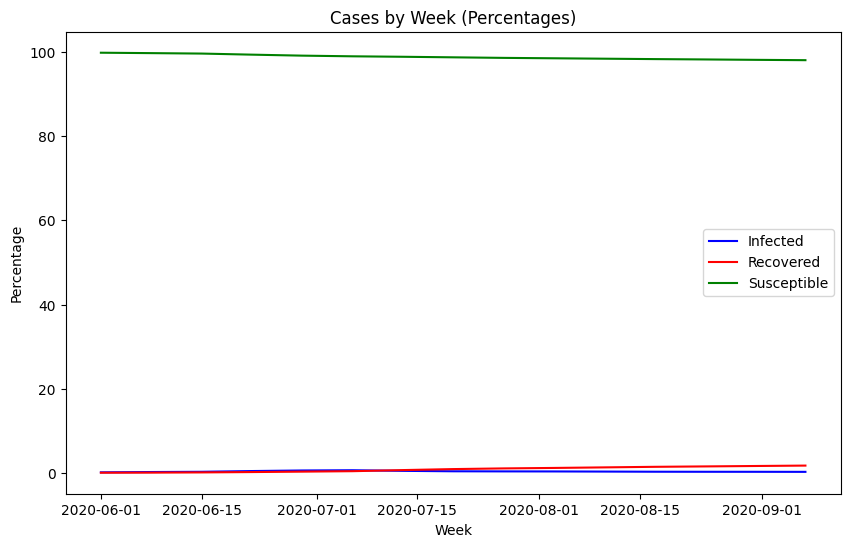

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(df_percentage["DATA_DIAGNOSTICO"], df_percentage["INFECTED"], color='blue', label='Infected')
plt.plot(df_percentage["DATA_DIAGNOSTICO"], df_percentage["RECOVERED"], color='red', label='Recovered')
plt.plot(df_percentage["DATA_DIAGNOSTICO"], df_percentage["SUSCEPTIBLE"], color='green', label='Susceptible')
plt.title("Cases by Week (Percentages)")
plt.xlabel("Week")
plt.ylabel("Percentage")
plt.legend()
plt.show()


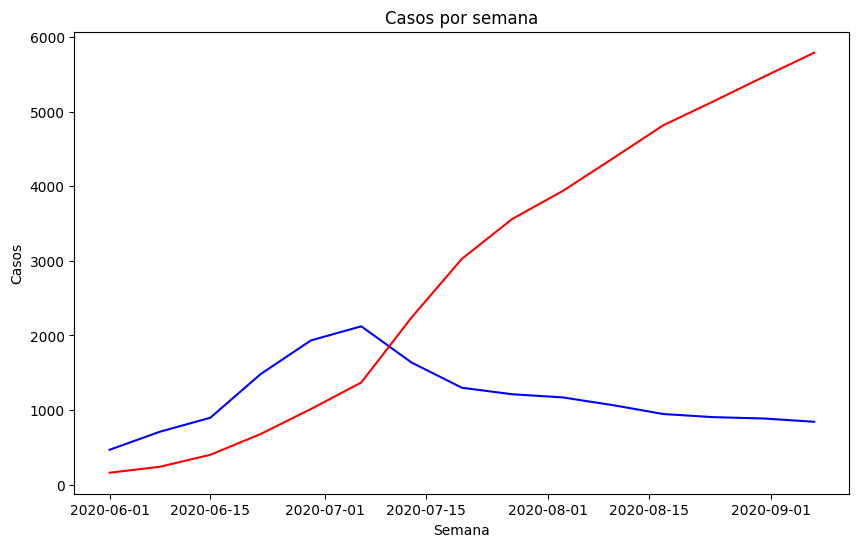

In [113]:
# plot de casos por semana
plt.figure(figsize=(10, 6))
# plt.plot(df_week_truncated["DATA_DIAGNOSTICO"], df_week_truncated["POPULAÇÃO SUSCETÍVEL"], color='green')
plt.plot(df_week_truncated["DATA_DIAGNOSTICO"], df_week_truncated["INFECTADOS"], color='blue')
plt.plot(df_week_truncated["DATA_DIAGNOSTICO"], df_week_truncated["RECUPERADOS"], color='red')
plt.title("Casos por semana")
plt.xlabel("Semana")
plt.ylabel("Casos")
plt.show()

# Informação das semanas truncadas. Iniciando análise SIR

### Dados iniciais
- S(0) = 0.99813139
- I(0) = 0.00140522	
- R(0) = 0.00047844

In [118]:
# Dados inicias
S0 = 0.99813139
I0 = 0.00140522	
R0 = 0.00047844

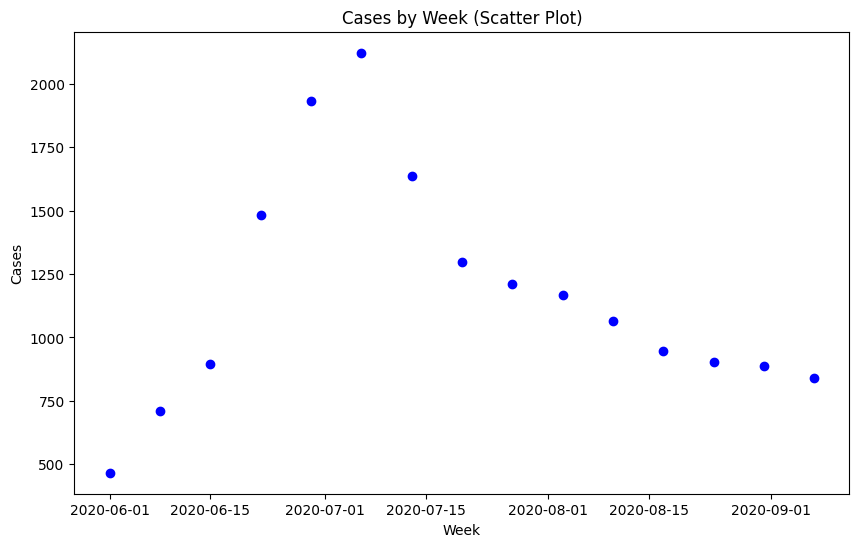

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_week_truncated["DATA_DIAGNOSTICO"], df_week_truncated["INFECTADOS"], color='blue')
plt.title("Cases by Week (Scatter Plot)")
plt.xlabel("Week")
plt.ylabel("Cases")
plt.show()
